# Importing libraries & setting common values

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
from matplotlib.lines import Line2D

plt.rcParams['text.usetex'] = True
plt.rc('font', family='serif')
plt.rc('legend', facecolor='white', edgecolor='k', framealpha=1)
plt.rcParams['xtick.major.size'] = 3.5
plt.rcParams['ytick.major.size'] = 3.5
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

def custom_save_fig(fig, fname):
    for ftype in ['.png', '.pdf']:
        fig.savefig('./output/plots/'+ fname + ftype, facecolor=(1,1,1,0), dpi=300, transparent=True)
# plt.rcParams.keys()

# Simulations' $a_l$

## Simulations' modulated $a_l$

0.06908247547397897
0.04913806173862389


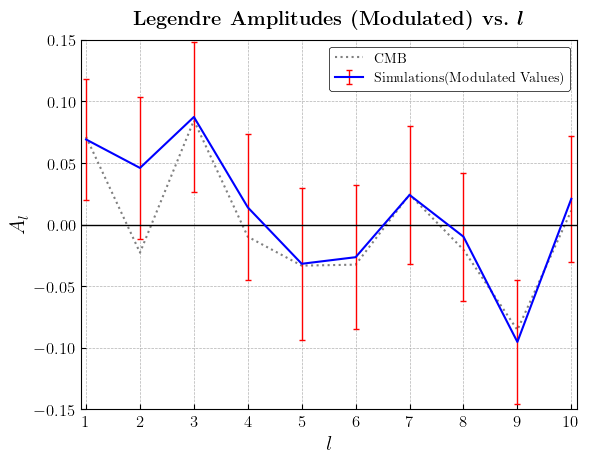

In [64]:
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')
sims_modulated_a_l  = np.loadtxt('./output/sims_modulated_a_l.txt')
max_l               = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_modulated_a_l, axis=0)
std_sims_result = np.std(sims_modulated_a_l, axis=0)
l_coeff         = np.arange(max_l + 1)

with plt.style.context('bmh'):
    fig, ax  = plt.subplots()

    grey_col = (0.5,0.5,0.5,1)
    # cmb 
    ax.plot(l_coeff[1:], avg_sims_result[1:],
            linewidth=1.5, linestyle=':', color=grey_col,
            label='CMB')

    # simulation values with errorbars
    ax.errorbar(l_coeff[1:], cmb_a_l[1:], std_sims_result[1:],
                color='blue', linewidth=1.5, label='Simulations(Modulated Values)',
                linestyle='-', ecolor='red', elinewidth=1, capsize = 2)
    
    margin = 0.1
    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
    ax.set_xlim((1 - margin, max_l + margin))
    ax.set_ylim((-0.15, 0.15))
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_title(r'\textbf{Legendre Amplitudes (Modulated) vs.} \boldmath{$l$}',
                 y = 1.02)
    ax.legend()
    # ax.yaxis.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, '64_inpainted_a_l_sims_modulated')
print(cmb_a_l[1])
print(std_sims_result[1])
plt.show()

## Simulations' internal $a_l$

### All sims

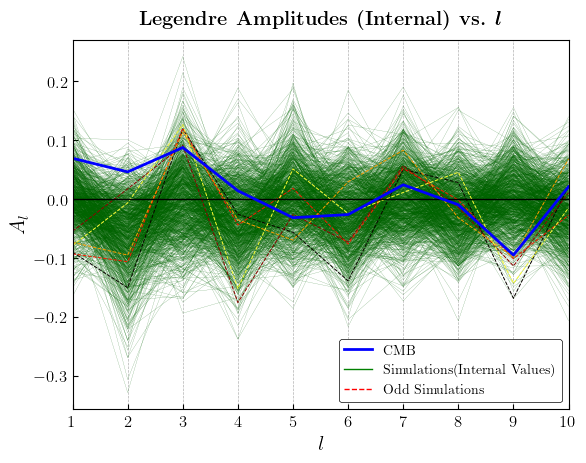

In [63]:
cmb_a_l             = np.loadtxt('./output/cmb_a_l.txt')
sims_internal_a_l   = np.loadtxt('./output/sims_internal_a_l.txt')
max_l               = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_internal_a_l, axis=0)[1:]
std_sims_result = np.std(sims_internal_a_l, axis=0)[1:]
l_coeff         = np.arange(max_l + 1)

# All plot -------------------------------------------
with plt.style.context('bmh'):
    fig, ax     = plt.subplots()

    # cmb
    ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=1)
    
    # simulation values with modulation applied
    for i in range(len(sims_internal_a_l)):
        ax.plot(l_coeff[1:], sims_internal_a_l[i][1:],
                linestyle='-', linewidth = .1, color='darkgreen')

    # custom colormap to visualize 1000 curves
    # some useful colormaps: 
    #       jet - magma - hot - winter - spring - summer - 
    #       cool - twilight - gist_earth - coolwarm - spectral - 
    _col_map = plt.get_cmap('hot') 
    col_norm  = colors.Normalize(vmin=0, vmax=1)
    scalar_cmap = cmx.ScalarMappable(norm=col_norm, cmap=_col_map)

    # l = 3 and l = 9 are nonzero! Who is more odd in these l's
    _filter = (cmb_a_l[3] < sims_internal_a_l[:, 3]) * (cmb_a_l[9] > sims_internal_a_l[:, 9])
    odd_indices = np.arange(len(_filter))[_filter]
    for i, index in enumerate(odd_indices):
        ax.plot(l_coeff[1:], sims_internal_a_l[index][1:],
                '--', linewidth = .7,
                color = scalar_cmap.to_rgba(i/len(odd_indices))
                )

    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)
    ax.plot(l_coeff[1:], cmb_a_l[1:], '-b', linewidth=2)

    margin = 0.05
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_xlim((1, max_l))
    ax.set_title(r'\textbf{Legendre Amplitudes (Internal) vs.} \boldmath{$l$}',
                 y = 1.02)
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.yaxis.grid(False)

    # Custom legends 
    sample_curves = [
        Line2D([0], [0], ls='-',color='b', lw=2),
        Line2D([0], [0], ls='-', color='g', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1)
        ]
    ax.legend(sample_curves, [r'CMB', r'Simulations(Internal Values)', r'Odd Simulations'])
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, 'a_l_sims_internal_all')
plt.show()

### Average of sims

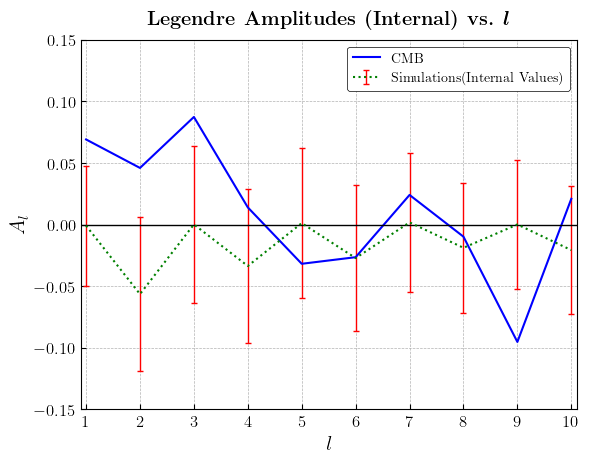

In [62]:
# Average plot -------------------------------------------

cmb_a_l                 = np.loadtxt('./output/cmb_a_l.txt')
sims_internal_a_l       = np.loadtxt('./output/sims_internal_a_l.txt')
max_l                   = len(cmb_a_l) - 1

avg_sims_result = np.mean(sims_internal_a_l, axis=0)
std_sims_result = np.std(sims_internal_a_l, axis=0)
l_coeff         = np.arange(max_l + 1)

with plt.style.context('bmh'):
    fig, ax     = plt.subplots()

    grey_col = (0.5,0.5,0.5,1)
    # simulation with errorbars
    ax.errorbar(l_coeff[1:], avg_sims_result[1:], std_sims_result[1:],
                color='g', linestyle=':',linewidth=1.5, label='Simulations(Internal Values)',
                ecolor='red', elinewidth=1, capsize = 2)
    
    # cmb
    ax.plot(l_coeff[1:], cmb_a_l[1:],
            linewidth=1.5, linestyle='-', color='b',
            label='CMB')
    
    ax.hlines([0], xmin = 1 - margin, xmax = max_l + margin, color='k', linestyle='-', linewidth=1)

    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    ax.set_xlabel(r'$l$', size=15)
    ax.set_ylabel(r'$A_l$', size=15)
    ax.set_xlim((1, max_l))
    ax.set_title(r'\textbf{Legendre Amplitudes (Internal) vs.} \boldmath{$l$}',
                 y = 1.02)
    margin = 0.1
    ax.set_xlim((1 - margin, max_l + margin))
    ax.set_ylim((-0.15, 0.15))
    ax.set_xticks(np.arange(1, max_l + 1, step=1))
    # ax.yaxis.grid(False)

    ax.legend()
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.set_facecolor('white')
    custom_save_fig(fig, '64_inpainted_a_l_sims_internal')
plt.show()

# Inpainted map

## Strip

### STD

#### STD with internal MAD & measures 

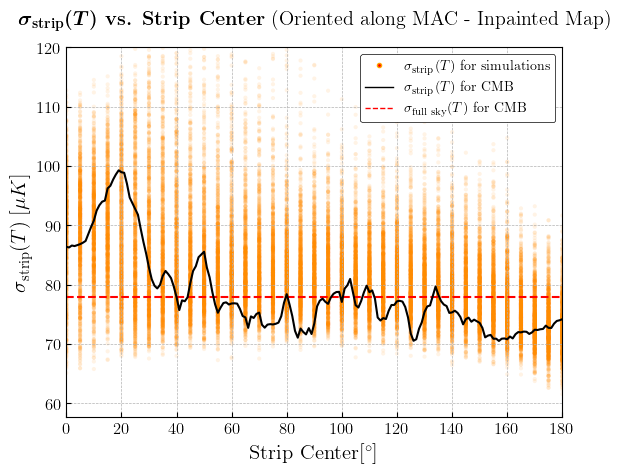

In [18]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')
# for full sky value
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')


with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for i, sim_mean in enumerate(sims_internal_measure):
        ax.scatter(sims_sampling_range, sim_mean,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # full sky horizontal line
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # cmb
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.5)
    # labels
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along MAC - Inpainted Map)',
                 y = 1.04)
    # limits
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 120)
    # legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-',color='k', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1),
        ]
    ax.legend(sample_curves, [
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_MAC_scatter_std_20strip')
plt.show()

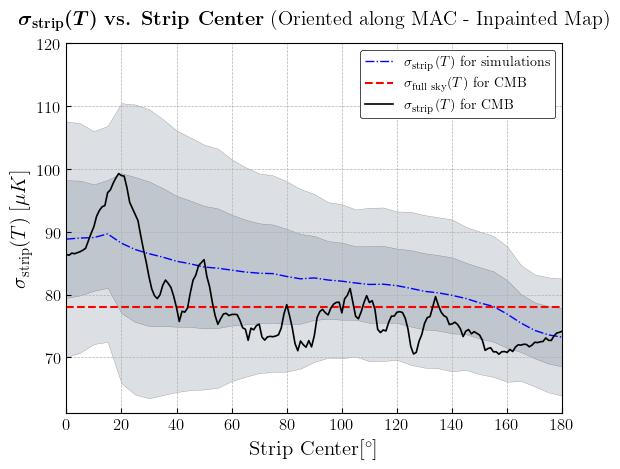

In [19]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')

sim_mean = np.mean(sims_internal_measure, axis=0)
sim_error   = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # One sigma
    fill_col  = (0.1, 0.2, 0.3, 0.15)
    edge_col    = (0, 0, 0, 0.5)
    ax.fill_between(sims_sampling_range, sim_mean - sim_error, sim_mean + sim_error,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # Two sigmas
    ax.fill_between(sims_sampling_range, sim_mean - sim_error * 2, sim_mean + sim_error * 2,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # simulations
    sim_mean = np.mean(sims_internal_measure, axis=0)
    sim_error   = np.std(sims_internal_measure, axis=0)
    ax.plot(sims_sampling_range, sim_mean,
            color='blue', linestyle='-.', linewidth=1)
    # Whole sky horizontal line
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # CMB
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.2)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Strip Center} (Oriented along MAC - Inpainted Map)',
                 y = 1.03)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 120)
    ax.legend([
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_MAC_errorband_std_20strip')
plt.show()

#### STD internal 30 deg

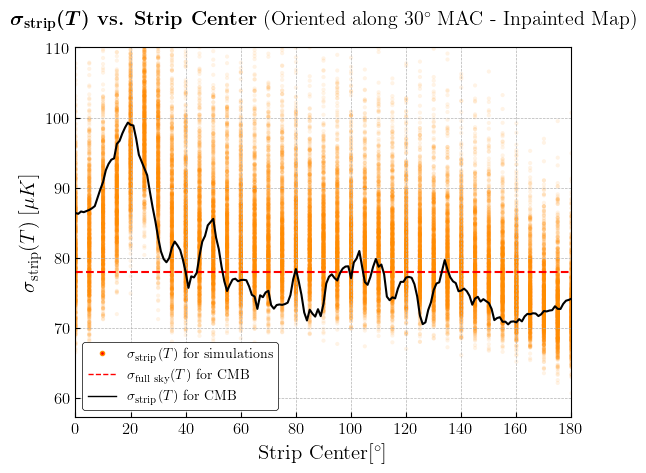

In [20]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_30_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_30_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')


with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for i, sim_mean in enumerate(sims_internal_measure):
        ax.scatter(sims_sampling_range, sim_mean,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=0.1)

    # Whole sky value
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # cmb
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.5)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along \unboldmath$30^\circ$ MAC - Inpainted Map)',
                 y = 1.04)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 110)
    sample_curves = [
        Line2D([0], [0], ls='none', color='darkorange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='--', color='r', lw=1),
        Line2D([0], [0], ls='-', color='k', lw=1),
        ]
    ax.legend(sample_curves,[
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_30_scatter_std_20strip')
plt.show()

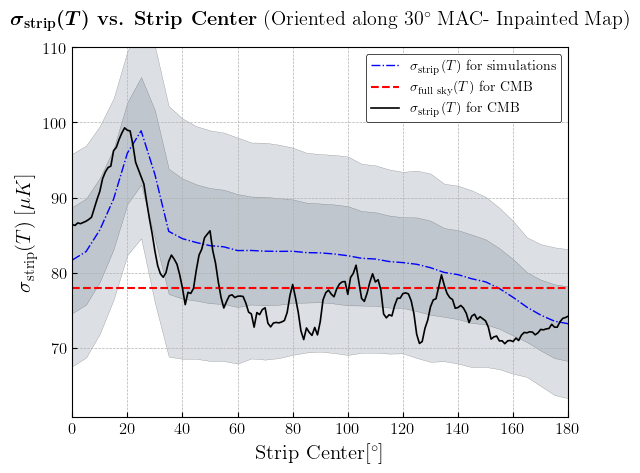

In [21]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_30_strip_std_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_30_strip_std_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')

sim_mean = np.mean(sims_internal_measure, axis=0)
sim_error   = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # One sigma
    fill_col  = (0.1, 0.2, 0.3, 0.15)
    edge_col    = (0, 0, 0, 0.5)
    ax.fill_between(sims_sampling_range, sim_mean - sim_error, sim_mean + sim_error,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # Two sigmas
    ax.fill_between(sims_sampling_range, sim_mean - sim_error * 2, sim_mean + sim_error * 2,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # simulations
    sim_mean = np.mean(sims_internal_measure, axis=0)
    sim_error   = np.std(sims_internal_measure, axis=0)
    ax.plot(sims_sampling_range, sim_mean,
            color='blue', linestyle='-.', linewidth=1)
    # Whole sky horizontal line
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1.5])
    # CMB
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.2)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along \unboldmath $30^\circ$ MAC- Inpainted Map)',
                 y = 1.04)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymax = 110)
    ax.legend([
                r'$\sigma_{\mathrm{strip}}(T)$ for simulations',
                r'$\sigma_{\mathrm{full \; sky}}(T)$ for CMB',
                r'$\sigma_{\mathrm{strip}}(T)$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_30_errorband_std_20strip')
plt.show()

#### STD with modulated

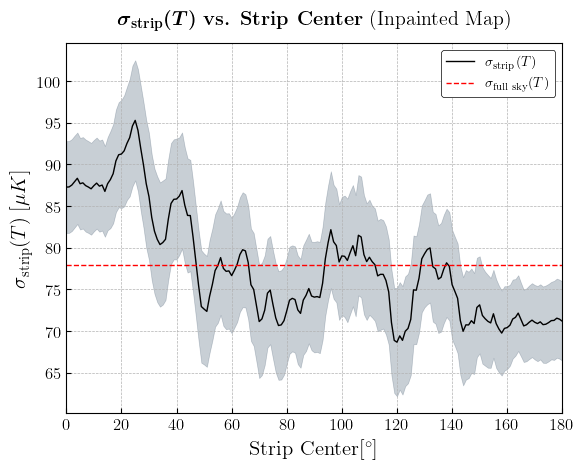

In [137]:
sims_internal_measure   = np.loadtxt('./output/sims_modulated_strip_std.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')

sims_errors = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(cmb_sampling_range, cmb_measure - sims_errors, cmb_measure + sims_errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1)
    ax.hlines([cmb_cap_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1])
    # ax.plot(sampling_range, np.mean(sims_mod_measure,axis=0), color='b',linestyle='--')
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                r' \textbf{vs. Strip Center} (Inpainted Map)',
                y = 1.03)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.legend([r'$\sigma_{\mathrm{strip}}(T)$', r'$\sigma_{\mathrm{full \; sky}}(T)$'])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_std_20strip')
plt.show()

#### STD Legendre fitting

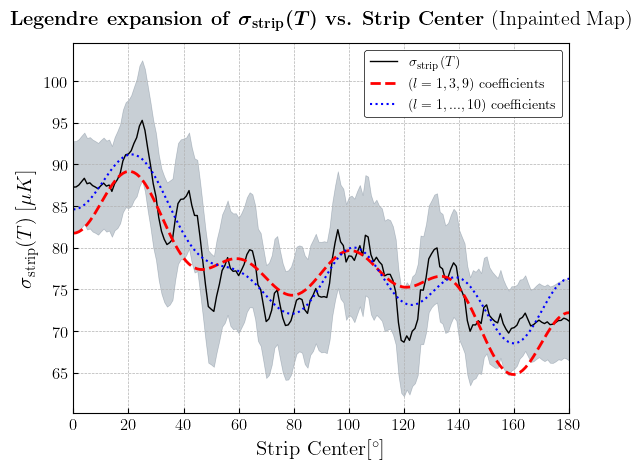

In [109]:
sims_internal_measure   = np.loadtxt('./output/sims_modulated_strip_std.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_std_measure_range.txt')
cmb_a_l                 = np.loadtxt('./output/cmb_a_l.txt')

sims_errors = np.std(sims_internal_measure, axis=0)

monopole = np.mean(cmb_measure)

theta           = cmb_sampling_range * np.pi / 180
al_pl_all       = np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(np.cos(theta)) for l in range(len(cmb_a_l))])
al_pl_nonzero   = np.array([cmb_a_l[l] * np.polynomial.Legendre.basis(l)(np.cos(theta)) for l in (0,1,3,9)])

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # one sigma band 
    ax.fill_between(cmb_sampling_range, cmb_measure - sims_errors, cmb_measure + sims_errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    # cmb std
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    # cmb legendre nonzero a_l
    ax.plot(cmb_sampling_range, monopole * np.sum(al_pl_nonzero, axis=0),
            color='r',linestyle='--', lw=2)
    # cmb legendre all a_l
    ax.plot(cmb_sampling_range, monopole * np.sum(al_pl_all, axis=0),
            linewidth=1.5, color='b',linestyle=':')
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{strip}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\textbf{Legendre expansion of }'+ r'\boldmath{{{}}}'.format(measure_text) + \
                r' \textbf{vs. Strip Center} (Inpainted Map)',
                 y=1.03)
    ax.legend([measure_text,
               r'($l=1, 3, 9$) coefficients',
               r'($l=1, ..., 10$) coefficients'])
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_std_20strip_legendre')
plt.show()

### DSTD2

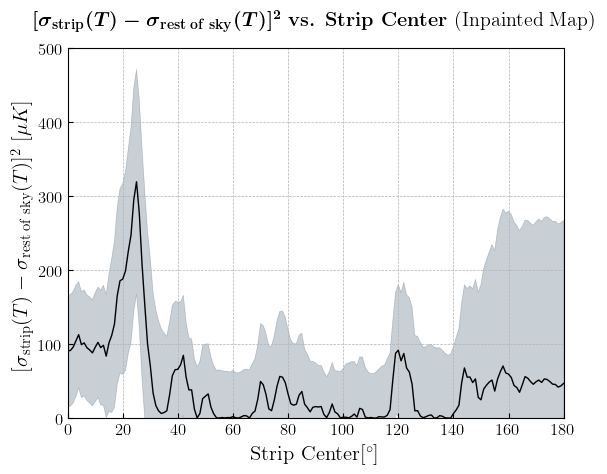

In [112]:
sims_internal_measure   = np.loadtxt('./output/sims_modulated_strip_dstd2.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_measure_range.txt')

sims_errors = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(cmb_sampling_range, cmb_measure - sims_errors, cmb_measure + sims_errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Strip Center} (Inpainted Map)',
                 y=1.04)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 500)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dstd2_20strip')
plt.show()

#### DSTD2 with simulation internal values

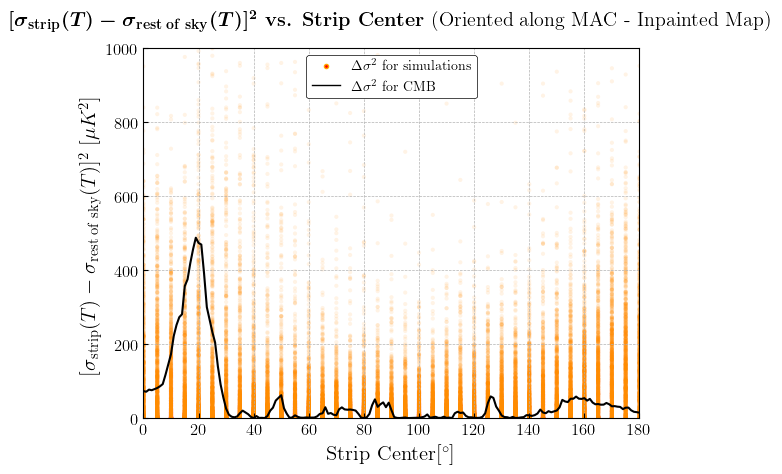

In [4]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_dstd2_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_dstd2_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_measure_range.txt')
# for full sky value
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')


with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # simulations
    for i, sim_mean in enumerate(sims_internal_measure):
        ax.scatter(sims_sampling_range, sim_mean,
                   marker='.', edgecolors='none', linewidths=1, c='darkorange', alpha=.1)
    # cmb
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.5)
    # labels
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K^2]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\textbf{ vs. Strip Center} (Oriented along MAC - Inpainted Map)',
                 y = 1.04)
    # limits
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 1000)
    # legends
    sample_curves = [
        Line2D([0], [0], ls='none', color='orange', lw=1, marker='.', markerfacecolor='r'),
        Line2D([0], [0], ls='-',color='k', lw=1),
        Line2D([0], [0], ls='--', color='r', lw=1),
        ]
    ax.legend(sample_curves, [
                r'$\Delta \sigma^2$ for simulations',
                r'$\Delta \sigma^2$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_MAC_scatter_dstd2_20strip')
plt.show()

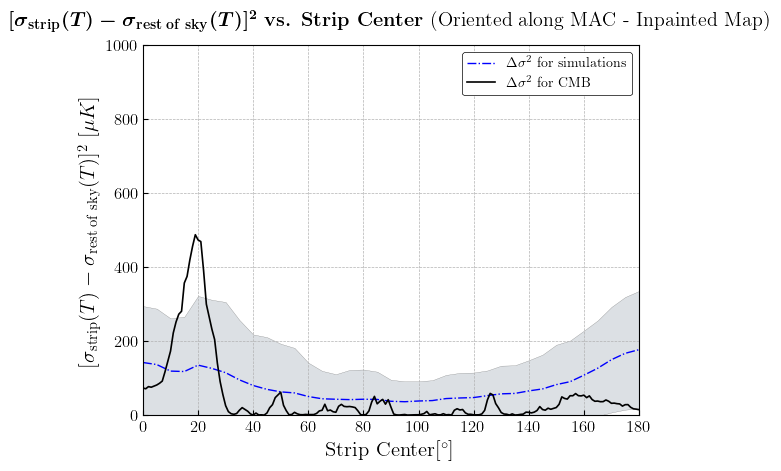

In [14]:
sims_internal_measure   = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_dstd2_measure.txt')
sims_sampling_range     = np.loadtxt('./output/sims_internal_inpainted_MAD_strip_dstd2_sampling_range.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_result.txt')
cmb_cap_measure         = np.loadtxt('./output/T_64_inpainted_cap_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_dstd2_measure_range.txt')

sim_mean = np.mean(sims_internal_measure, axis=0)
sim_error   = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    # One sigma
    fill_col  = (0.1, 0.2, 0.3, 0.15)
    edge_col    = (0, 0, 0, 0.5)
    ax.fill_between(sims_sampling_range, sim_mean - sim_error, sim_mean + sim_error,
                    color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # Two sigmas
    # ax.fill_between(sims_sampling_range, sim_mean - sim_error * 2, sim_mean + sim_error * 2,
    #                 color = fill_col, linewidth = 0.2, edgecolor = edge_col, label='_nolegend_')
    # simulations
    sim_mean = np.mean(sims_internal_measure, axis=0)
    sim_error   = np.std(sims_internal_measure, axis=0)
    ax.plot(sims_sampling_range, sim_mean,
            color='blue', linestyle='-.', linewidth=1)
    # CMB
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1.2)

    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{strip}}(T) - \sigma_{\mathrm{rest\;of\;sky}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Strip Center} (Oriented along MAC - Inpainted Map)',
                 y = 1.03)
    ax.set_xlim(xmin = 0, xmax = 180)
    ax.set_ylim(ymin = 0, ymax = 1000)
    ax.legend([
                r'$\Delta\sigma^2$ for simulations',
                r'$\Delta\sigma^2$ for CMB',
            ])
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_internal_MAC_errorband_dstd2_20strip')
plt.show()

### Corr

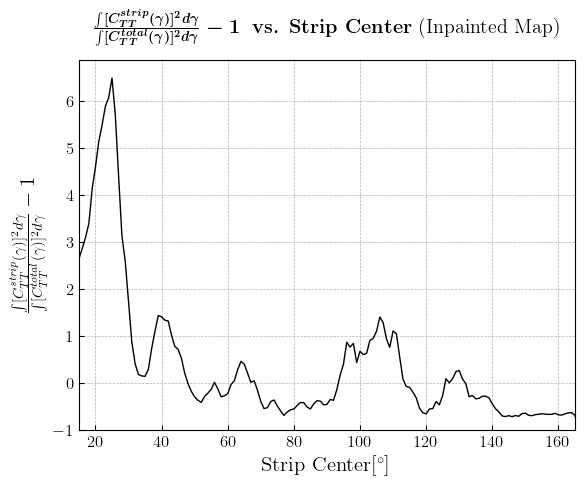

In [114]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_corr_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_20strip_corr_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\frac {{ \int [C_{TT}^{{strip}}(\gamma)]^2 d\gamma }} {{ \int [C_{TT}^{{total}}(\gamma)]^2 d\gamma }} - 1$'
    ax.set_ylabel(measure_text,size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\; \textbf{vs. Strip Center} (Inpainted Map)',
                 y = 1.05)
    ax.set_xlim(xmin = 15, xmax = 165)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # ax.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_corr_20strip')
plt.show()

### DCORR2

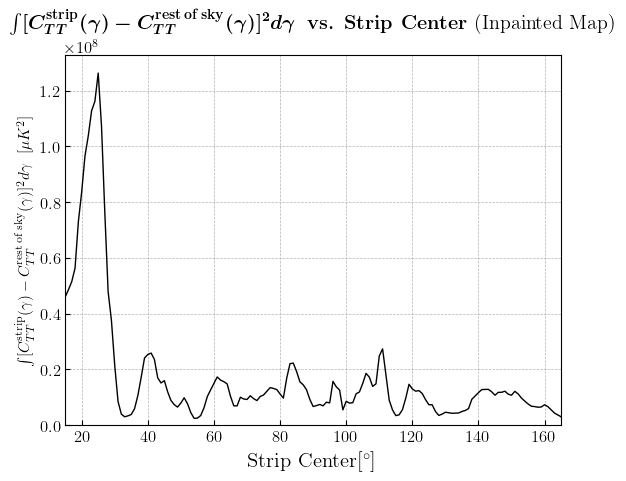

In [120]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_20strip_dcorr2_result.txt')
cmb_sampling_range  = np.loadtxt('./output/T_64_inpainted_20strip_dcorr2_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(cmb_sampling_range, cmb_measure, color='k', linewidth=1)
    ax.set_xlabel(r'Strip Center[$^\circ$]',size=15)
    measure_text = r'$\int [C_{TT}^{{\mathrm{strip}}}(\gamma) - C_{TT}^{{\mathrm{rest\,of\,sky}}}(\gamma)]^2 d\gamma$'
    ax.set_ylabel(measure_text + r'\; $[\mu K^2]$',size=11)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r'\; \textbf{vs. Strip Center} (Inpainted Map)',
                 y = 1.05)
    ax.set_xlim(xmin = 15, xmax = 165)
    ax.set_ylim(ymin = 0)
    ax.set_facecolor('white')
    # ax.grid(False)
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dcorr2_20strip')
plt.show()

## Cap

### STD

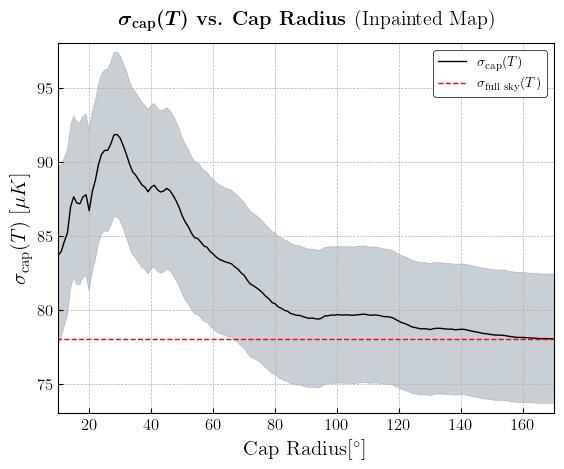

In [136]:
sims_internal_measure   = np.loadtxt('./output/sims_modulated_cap_std.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_cap_std_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_std_measure_range.txt')

sims_errors = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(cmb_sampling_range, cmb_measure - sims_errors, cmb_measure + sims_errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.hlines([cmb_measure[-1]], 0, 180, colors=['r'], linestyles=['--'], linewidths=[1])
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\sigma_{\mathrm{cap}}(T)$'
    ax.set_ylabel(measure_text + r'$\; [\mu K]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Cap Radius} (Inpainted Map)',
                 y=1.03)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = 73, ymax = 98)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    ax.legend([r'$\sigma_{\mathrm{cap}}(T)$', r'$\sigma_{\mathrm{full \; sky}}(T)$'])
    custom_save_fig(fig, '64_inpainted_std_cap')
plt.show()

### DSTD2

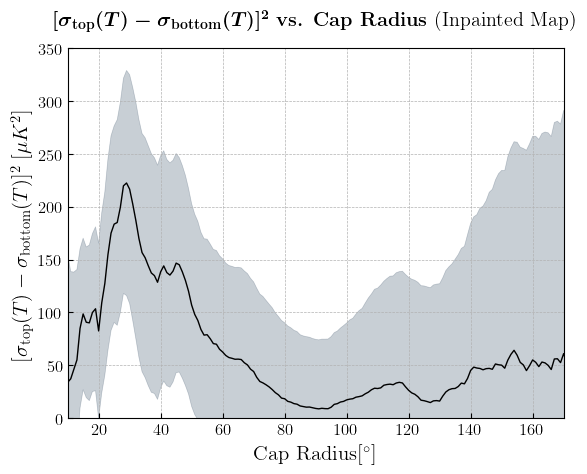

In [124]:
sims_internal_measure   = np.loadtxt('./output/sims_modulated_cap_dstd2.txt')
cmb_measure             = np.loadtxt('./output/T_64_inpainted_cap_dstd2_result.txt')
cmb_sampling_range      = np.loadtxt('./output/T_64_inpainted_cap_dstd2_measure_range.txt')

sims_errors = np.std(sims_internal_measure, axis=0)

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.fill_between(cmb_sampling_range, cmb_measure - sims_errors, cmb_measure + sims_errors,
                    color=(0.15,0.25,0.35,0.25), label='_nolegend_')
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$[\sigma_{\mathrm{top}}(T) - \sigma_{\mathrm{bottom}}(T)]^2$'
    ax.set_ylabel(measure_text + r'$\; [\mu K^2]$',size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Cap Radius} (Inpainted Map)',
                 y=1.04)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = 0, ymax = 350)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dstd2_cap')
plt.show()

### CORR

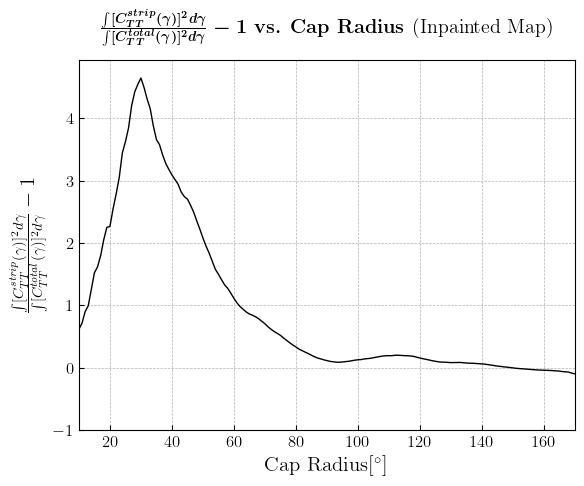

In [125]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_corr_result.txt')
cmb_sampling_range  = np.loadtxt('./output/T_64_inpainted_cap_corr_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\frac {{ \int [C_{TT}^{{strip}}(\gamma)]^2 d\gamma }} {{ \int [C_{TT}^{{total}}(\gamma)]^2 d\gamma }} - 1$'
    ax.set_ylabel(measure_text ,size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Cap Radius} (Inpainted Map)',
                 y=1.05)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_corr_cap')
plt.show()

### DCORR2

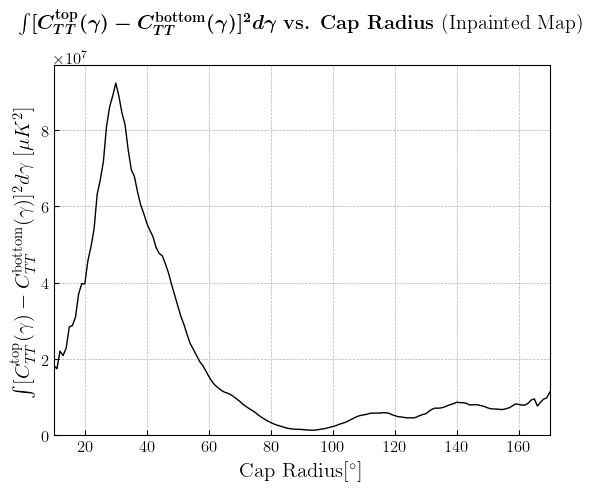

In [126]:
cmb_measure         = np.loadtxt('./output/T_64_inpainted_cap_dcorr2_result.txt')
cmb_sampling_range  = np.loadtxt('./output/T_64_inpainted_cap_dcorr2_measure_range.txt')

with plt.style.context('bmh'):
    fig, ax=plt.subplots()
    ax.plot(cmb_sampling_range, cmb_measure,
            color='k', linewidth=1)
    ax.set_xlabel(r'Cap Radius[$^\circ$]',size=15)
    measure_text = r'$\int [C_{TT}^{{\mathrm{top}}}(\gamma) - C_{TT}^{{\mathrm{bottom}}}(\gamma)]^2 d\gamma$'
    ax.set_ylabel(measure_text  + r'$\; [\mu K^2]$', size=15)
    ax.set_title(r'\boldmath{{{}}}'.format(measure_text) + \
                 r' \textbf{vs. Cap Radius} (Inpainted Map)',
                 y=1.08)
    ax.set_xlim(xmin = 10, xmax = 170)
    ax.set_ylim(ymin = -1)
    ax.set_facecolor('white')
    # Axis colors
    for spine in ax.spines.keys(): ax.spines[spine].set_color('k')
    custom_save_fig(fig, '64_inpainted_dcorr2_cap')
plt.show()